# 1 - Preparing data

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from sklearn.utils import shuffle

In [186]:
books_data=pd.read_json("./data/Books_small_10000.json",lines=True)

In [187]:
books_data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1F2H80A1ZNN1N,B00GDM3NQC,Connie Correll,"[0, 0]","I bought both boxed sets, books 1-5. Really a...",5,Can't stop reading!,1390435200,"01 23, 2014"
1,AI3DRTKCSK4KX,B00A5MREAM,Grandma,"[0, 0]",I enjoyed this short book. But it was way way ...,3,A leaf on the wind of all hallows,1399593600,"05 9, 2014"
2,A3KAKFHY9DAC8A,0446547573,"toobusyreading ""Inspired Kathy""","[1, 1]",I love Nicholas Sparks. I&#8217;ve read everyt...,4,Great writing from Nicholas Sparks.,1404518400,"07 5, 2014"
3,ATYBCYD6BIXVL,0955809215,Chrissie,"[0, 0]",I really enjoyed this adventure and look forwa...,4,great,1389225600,"01 9, 2014"
4,A17K95SEU3J68U,0991500776,"Sirde ""artist761""","[0, 0]",It was a decent read.. typical story line. Not...,3,It was a decent read.. typical story line ...,1404864000,"07 9, 2014"


In [188]:
books_data.shape

(10000, 9)

In [189]:
def get_sentiment(data):
        if data <=2:
            return 'NEGATIVE'
        elif data == 3:
            return 'NEUTRAL'
        else:
            return 'POSITIVE'

In [190]:
books_data['sentiment'] = books_data['overall'].map(lambda x: get_sentiment(x))

In [191]:
books_data.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
0,A1F2H80A1ZNN1N,B00GDM3NQC,Connie Correll,"[0, 0]","I bought both boxed sets, books 1-5. Really a...",5,Can't stop reading!,1390435200,"01 23, 2014",POSITIVE
1,AI3DRTKCSK4KX,B00A5MREAM,Grandma,"[0, 0]",I enjoyed this short book. But it was way way ...,3,A leaf on the wind of all hallows,1399593600,"05 9, 2014",NEUTRAL
2,A3KAKFHY9DAC8A,0446547573,"toobusyreading ""Inspired Kathy""","[1, 1]",I love Nicholas Sparks. I&#8217;ve read everyt...,4,Great writing from Nicholas Sparks.,1404518400,"07 5, 2014",POSITIVE
3,ATYBCYD6BIXVL,0955809215,Chrissie,"[0, 0]",I really enjoyed this adventure and look forwa...,4,great,1389225600,"01 9, 2014",POSITIVE
4,A17K95SEU3J68U,0991500776,"Sirde ""artist761""","[0, 0]",It was a decent read.. typical story line. Not...,3,It was a decent read.. typical story line ...,1404864000,"07 9, 2014",NEUTRAL
5,AAPAK68BFPHA1,B00HPHL9OW,Michelle Dodd,"[0, 0]",I hoped for Mia to have some peace in this boo...,5,Absolutely compelling book I felt Mia's Story ...,1389830400,"01 16, 2014",POSITIVE
6,A1ETRQ3VMHZYLK,0307451305,Kahoutek,"[0, 0]",The book has the fevered intensity of Oliver S...,2,A Fevered Mess,1394668800,"03 13, 2014",NEGATIVE
7,A3LVKEP5T8HO6D,0843960221,Beck,"[0, 0]","This is the First book in the Trilogy, and I'm...",5,The Road to a Hanging,1399075200,"05 3, 2014",POSITIVE
8,A14PRVP4JK88E7,B00JKW55EA,Rafase282,"[0, 0]",After reading the other book about introvert p...,5,The follow up!,1397606400,"04 16, 2014",POSITIVE
9,A3SOAJ7WJFHVFN,1493770691,Sara S.,"[2, 2]","I really, really like this book because the he...",5,Decency prevails!,1397779200,"04 18, 2014",POSITIVE


## Imbalanced data 

In [192]:
books_data['sentiment'].value_counts()

POSITIVE    8378
NEUTRAL      978
NEGATIVE     644
Name: sentiment, dtype: int64

In [195]:
positive_reviews = books_data[books_data['sentiment'] == 'POSITIVE']
negative_reviews = books_data[books_data['sentiment'] == 'NEGATIVE']

size_negative = negative_reviews.shape[0]

new_positive_reviews = positive_reviews.sample(size_negative)

reviews = pd.concat([negative_reviews,new_positive_reviews],axis=0)
books_data = reviews

In [196]:
books_data['sentiment'].value_counts()

NEGATIVE    644
POSITIVE    644
Name: sentiment, dtype: int64

# 2 - Train_test split

In [197]:
X = books_data['reviewText']
y = books_data['sentiment']

In [198]:
lista= [value for value in X.values if '127775' in value ]
lista

['Karice Bolton u deserve 5 golden &#127775;&#127775;&#127775;&#127775;&#127775;I absolutely love this series and the characters seem so real! A MUST READ!']

In [199]:
np.where(X.values == lista)[0][0]

1282

In [200]:
X.values[1282] = "I absolutely love this series and the characters seem so real! A MUST READ!"

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [202]:
print(X_test.head(1))
print(y_test.head(1))
print(X_train.head(1))
print(y_train.head(1))

5435    What a light, fun and entertaining story.  Tot...
Name: reviewText, dtype: object
5435    POSITIVE
Name: sentiment, dtype: object
7208    Most of the book, when it does deal with Hudso...
Name: reviewText, dtype: object
7208    NEGATIVE
Name: sentiment, dtype: object


In [203]:
y_train.value_counts()

NEGATIVE    436
POSITIVE    426
Name: sentiment, dtype: int64

In [204]:
y_test.value_counts()

POSITIVE    218
NEGATIVE    208
Name: sentiment, dtype: int64

# 3 -  TF-IDF: Term’s Frequency (TF) Inverse Document Frequency (IDF).

## TF: The frequency of a word in a document(text). When you know it, you’re able to see if you’re using a term too much or too little. 

$TF(t) = \dfrac{Number \ of \ times \ word \ t \ appears \ in \ a \ document}{Total \ number \ of \ words \ in \ the \ document}$

## IDF: The measure of how significant that term is in the whole corpus.

$IDF(t) = log_e \bigg(\dfrac{Total \ number \ of \ documents}{Number \ of \ documents \ with \ word \ t \ in \ it}\bigg) $

# TF-IDF = TF*IDF
##  The higher the TF*IDF value, the rarer the term. The smaller the weight, the more common the term.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [205]:
vectorizer = TfidfVectorizer()
X_train_vectorized=vectorizer.fit_transform(X_train)
X_test_vectorized=vectorizer.transform(X_test)

# 4 - Latent Semantic Analysis 

In [19]:
from sklearn.decomposition import TruncatedSVD
import time

In [206]:
t0 = time.time()

svd = TruncatedSVD(n_components=X_train_vectorized.shape[0])
X_train_svd = svd.fit_transform(X_train_vectorized)

X_test_svd = svd.transform(X_test_vectorized)

print('total time taken:',time.time()-t0)

total time taken: 3.9838738441467285


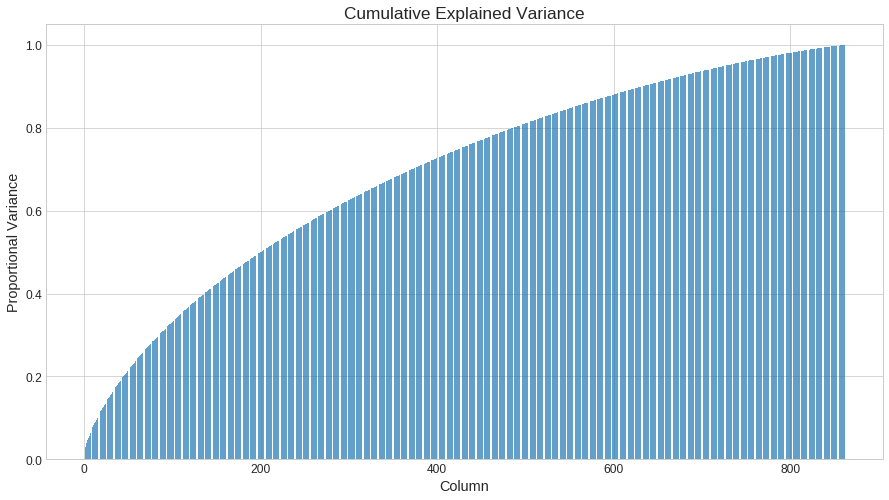

In [207]:
plt.figure(figsize=(15,8))
plt.title('Cumulative Explained Variance',size='xx-large')
plt.xlabel('Column',size='x-large')
plt.xticks(size='large')
plt.ylabel('Proportional Variance',size='x-large')
plt.yticks(size='large')
plt.bar(range(svd.explained_variance_ratio_.shape[0]),svd.explained_variance_ratio_.cumsum(),alpha=.7)
plt.show()



In [87]:
#from sklearn.utils.extmath import safe_sparse_dot

# Getting the projection on the first 1500 columns
#X_train_svd = safe_sparse_dot(X_train_vectorized,svd.components_[:1500].T)
#X_test_svd = safe_sparse_dot(X_test_vectorized,svd.components_[:1500].T)

#X_train_svd.shape

In [208]:
X_train_vectorized=pd.DataFrame(data=X_train_vectorized.toarray(),columns = vectorizer.get_feature_names())
X_test_vectorized=pd.DataFrame(data=X_test_vectorized.toarray(),columns = vectorizer.get_feature_names())

In [209]:
n_pcs = svd.components_.shape[0]

# get the index of the most important feature on EACH component
most_important = [np.abs(svd.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X_train_vectorized.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}


# each feature impacts each PC(eigenvector) diferently
df_svd = pd.DataFrame(dic.items(),columns=['PCs','Most Important Feature'])
df_svd=df_svd.set_index('PCs')
df_svd

,Most Important Feature
PCs,
PC0,the
PC1,it
PC2,34
PC3,the
PC4,34
...,...
PC857,patience
PC858,disappointed
PC859,developed


In [210]:
df_svd['Most Important Feature'].value_counts()

thumbs     15
advice     14
button     14
wast       13
serve      13
           ..
novella     1
no          1
weight      1
history     1
typical     1
Name: Most Important Feature, Length: 442, dtype: int64

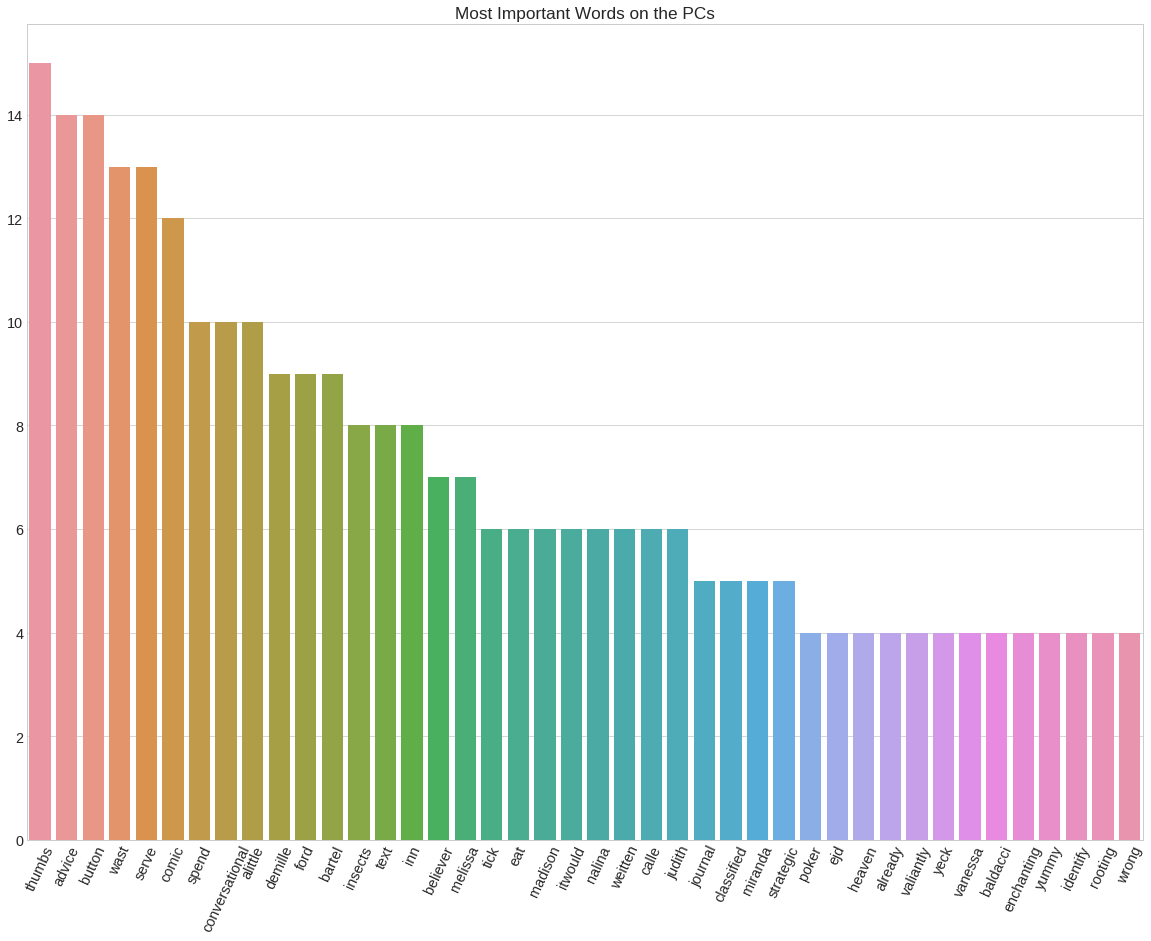

In [211]:
threshold = 3
sorted_most_important = df_svd['Most Important Feature'].value_counts()
sorted_most_important = sorted_most_important[sorted_most_important>threshold]


plt.figure(figsize=(20,15))
plt.title('Most Important Words on the PCs',size='xx-large')
plt.yticks(size='x-large')
fig=sns.barplot(x=sorted_most_important.keys(),y=sorted_most_important.values)
fig.set_xticklabels(fig.get_xticklabels(),rotation=65,size='x-large')
plt.show()


# 5 - Classificators

In [227]:
import numpy as np
from sklearn.metrics import classification_report,f1_score,confusion_matrix 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC

In [213]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(solver = "liblinear",random_state=0),
    "LinearSVC": LinearSVC(random_state=0),
    "SVC":SVC(random_state=0)
}

In [218]:
classifiers_names = list(dict_classifiers.keys())
classifiers_values=list(dict_classifiers.values())


In [219]:
def train_model(model,svd=False):
    if svd:
        model.fit(X_train_svd,y_train)
        y_test_pred = model.predict(X_test_svd)
    else:
        model.fit(X_train_vectorized,y_train)
        y_test_pred = model.predict(X_test_vectorized)
    
    print('f1 = ',f1_score(y_test, y_test_pred,average='weighted'))
    print('\n')
    return times

In [220]:
times,precs = [],[]
names = ['No_SVD','Yes_SVD']
flag = False
for name in names:
    print('--'*15+f'{name}'+'--'*15)
    for key,value in zip(classifiers_names,classifiers_values):
        print('--'*6+f'{key}'+'--'*6)
        Time=train_model(value,flag)
        times.append(Time)
    flag = True

------------------------------No_SVD------------------------------
------------Logistic Regression------------
f1 =  0.8731388174703414


------------LinearSVC------------
f1 =  0.8849898396776251


------------SVC------------
f1 =  0.8685040327567373


------------------------------Yes_SVD------------------------------
------------Logistic Regression------------
f1 =  0.8731388174703414


------------LinearSVC------------
f1 =  0.8849898396776251


------------SVC------------
f1 =  0.8635372252645476




In [221]:
print(X_train_vectorized.shape)
print(X_train_svd.shape)

(862, 8663)
(862, 862)


## SVD drastically reduces the number of columns and preserves the matrix's variance

# 6 - Grid_search

In [222]:
from sklearn.model_selection import GridSearchCV

In [228]:
model = LinearSVC(random_state=0)
penalty = ['l1', 'l2']
multi_class = ['ovr','crammer_singer']
C = [1, 10, 100, 1000]
loss = ['hinge', 'squared_hinge']

parameters = dict(penalty=penalty, multi_class=multi_class, C=C,loss=loss)

grid = GridSearchCV(model, parameters, cv = 3, verbose = 2, n_jobs = 3,scoring='f1_weighted')
grid.fit(X_train_svd, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  64 tasks      | elapsed:    2.1s
[Parallel(n_jobs=3)]: Done  96 out of  96 | elapsed:    3.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=0, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=3,
             param_grid={'C': [1, 10, 100, 1000],
                         'loss': ['hinge', 'squared_hinge'],
                         'multi_class': ['ovr', 'crammer_singer'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=2)

In [229]:
grid.best_score_

0.8259386595215678

In [230]:
print(grid.best_estimator_)
model = grid.best_estimator_

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)


# 7 - Evaluation

In [232]:
X_train_svd=pd.DataFrame(data=X_train_svd)
X_test_svd=pd.DataFrame(data=X_test_svd)

In [233]:
scores = cross_val_score(model, pd.concat([X_train_svd,X_test_svd]), pd.concat([y_train,y_test]), cv = 5, scoring='f1_weighted')
scores

array([0.81782672, 0.8564835 , 0.86432274, 0.87159144, 0.87548261])

In [234]:
y_test_pred = model.predict(X_test_svd)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    NEGATIVE       0.86      0.88      0.87       208
    POSITIVE       0.88      0.86      0.87       218

    accuracy                           0.87       426
   macro avg       0.87      0.87      0.87       426
weighted avg       0.87      0.87      0.87       426



In [246]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

print('True Negatives = ', conf_matrix[0,0]/conf_matrix.sum())
print('True Positives = ', conf_matrix[1,1]/conf_matrix.sum())
print('False Positives - Erro Tipo I = ', conf_matrix[0,1]/conf_matrix.sum())
print('False Negatives - Erro Tipo II = ', conf_matrix[1,0]/conf_matrix.sum())

True Negatives =  0.4295774647887324
True Positives =  0.43896713615023475
False Positives - Erro Tipo I =  0.05868544600938967
False Negatives - Erro Tipo II =  0.07276995305164319
